## Visualizações dos dados

Nesse notebook são feitas as visualizações dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from utils.load_csv import load_csv
from utils.load_shp import load_shp

In [2]:
gdf_final = load_csv('gdf_final.csv')

distritos_final = load_shp('distritos_final.shp')

1. Proporção por tipo de ônibus

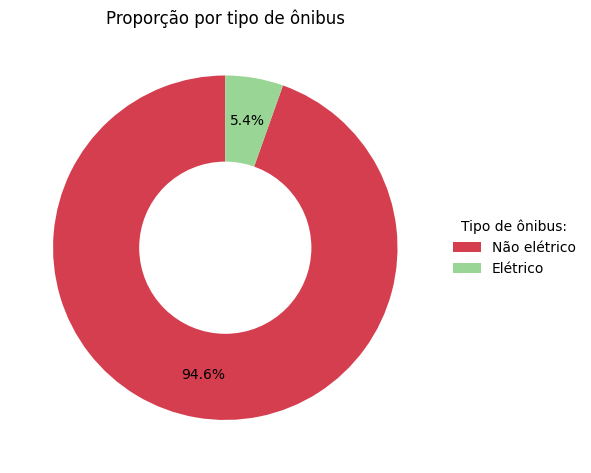

In [3]:
contagem_eletrico = gdf_final["is_eletrico"].value_counts()

fig, ax, = plt.subplots(figsize=(6, 6))

ax.pie(contagem_eletrico,
       autopct="%1.1f%%", 
       startangle=90,
       pctdistance=0.75,
       colors=["#d53e4f", "#99d594"])

centre_circle = plt.Circle((0, 0), 0.5, fc = 'white')

fig.gca().add_artist(centre_circle)

ax.set_title("Proporção por tipo de ônibus")

ax.legend(["Não elétrico", "Elétrico"], 
          title="Tipo de ônibus:",
          loc="center left",
          frameon=False,
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()

plt.show()

2. Proporção de ônibus elétricos por modelo

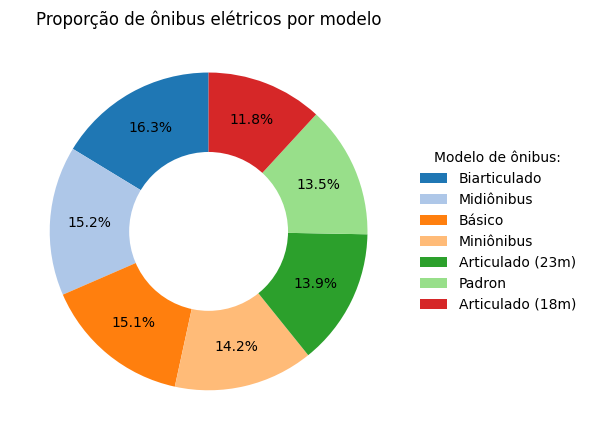

In [4]:
onibus_eletricos = gdf_final[gdf_final["is_eletrico"] == True]

contagem_modelo = onibus_eletricos["modelo"].value_counts()

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(contagem_modelo,
       autopct="%1.1f%%",
       startangle=90,
       pctdistance=0.75,
       colors=plt.cm.tab20.colors)

centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title("Proporção de ônibus elétricos por modelo")

ax.legend(contagem_modelo.index,
          title="Modelo de ônibus:",
          loc="center left",
          frameon=False,
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()

plt.show()

3. Emissões de CO₂ acumuladas/evitadas ao longo do dia

In [5]:
gdf_final["momento_inicial"] = pd.to_datetime(gdf_final["momento_inicial"])

gdf_final["hora_min"] = gdf_final["momento_inicial"].dt.strftime("%H:%M")

df_eletricos = gdf_final[gdf_final["is_eletrico"] == True]

df_nao_eletricos = gdf_final[gdf_final["is_eletrico"] == False]

emissoes = df_nao_eletricos.groupby("hora_min")["emissao_co2"].sum().cumsum().sort_index()

emissoes_evitadas = df_eletricos.groupby("hora_min")["emissao_co2"].sum().cumsum().sort_index()

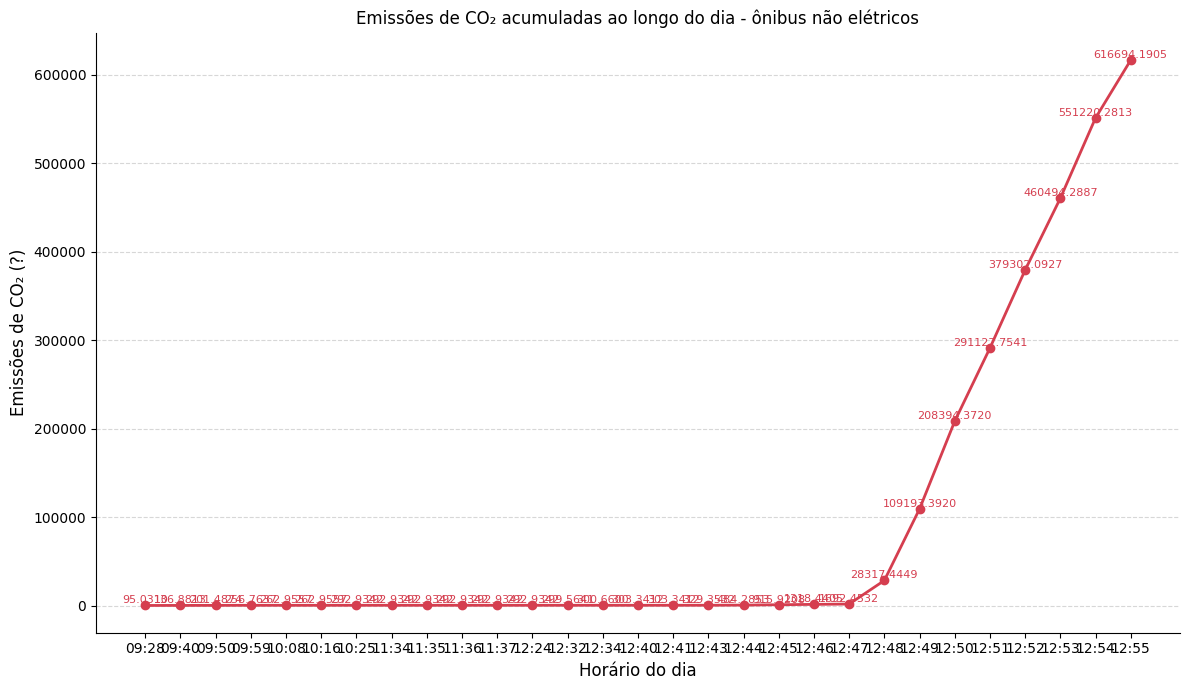

In [6]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(emissoes.index, emissoes.values,
        marker="o", color="#d53e4f", linewidth=2)

for x, y in zip(emissoes.index, emissoes.values):
    ax.text(x, y, f"{y:.4f}", fontsize=8, color="#d53e4f", ha="center", va="bottom")

ax.set_title("Emissões de CO₂ acumuladas ao longo do dia - ônibus não elétricos", fontsize=12)
ax.set_ylabel("Emissões de CO₂ (?)", fontsize=12)
ax.set_xlabel("Horário do dia", fontsize=12)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.yaxis.grid(True, linestyle="--", alpha=0.5)
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

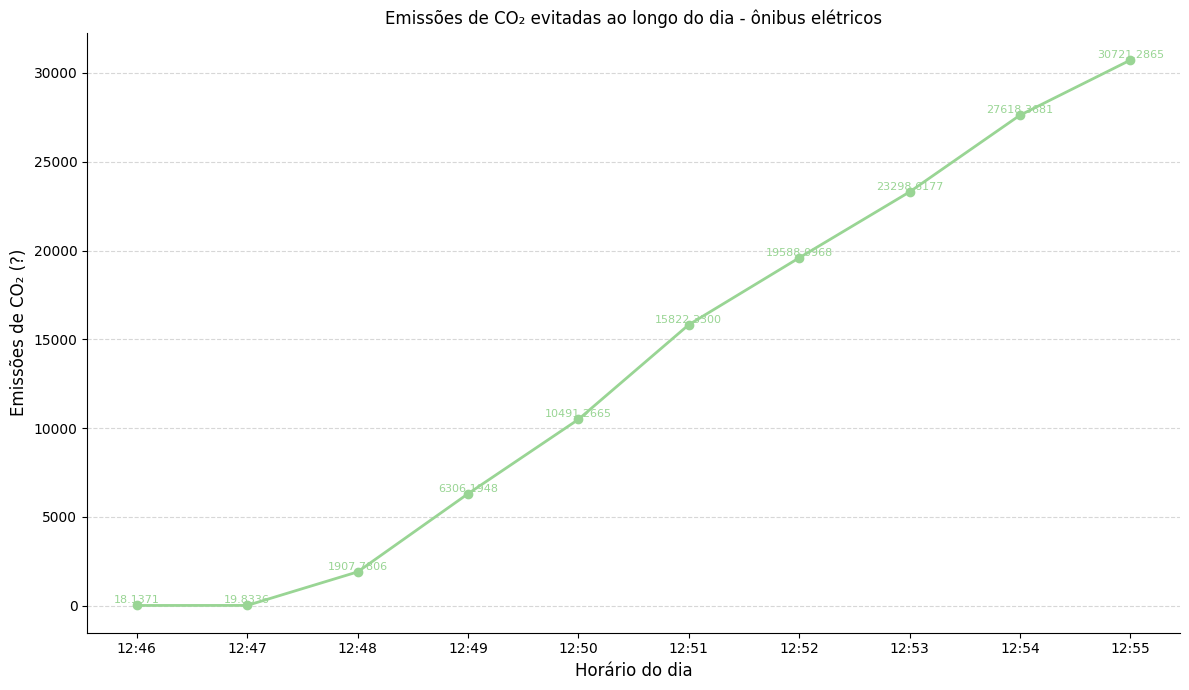

In [7]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(emissoes_evitadas.index, emissoes_evitadas.values,
        marker="o", color="#99d594", linewidth=2)

for x, y in zip(emissoes_evitadas.index, emissoes_evitadas.values):
    ax.text(x, y, f"{y:.4f}", fontsize=8, color="#99d594", ha="center", va="bottom")

ax.set_title("Emissões de CO₂ evitadas ao longo do dia - ônibus elétricos", fontsize=12)
ax.set_ylabel("Emissões de CO₂ (?)", fontsize=12)
ax.set_xlabel("Horário do dia", fontsize=12)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.yaxis.grid(True, linestyle="--", alpha=0.5)
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

4. Mapas coropléticos

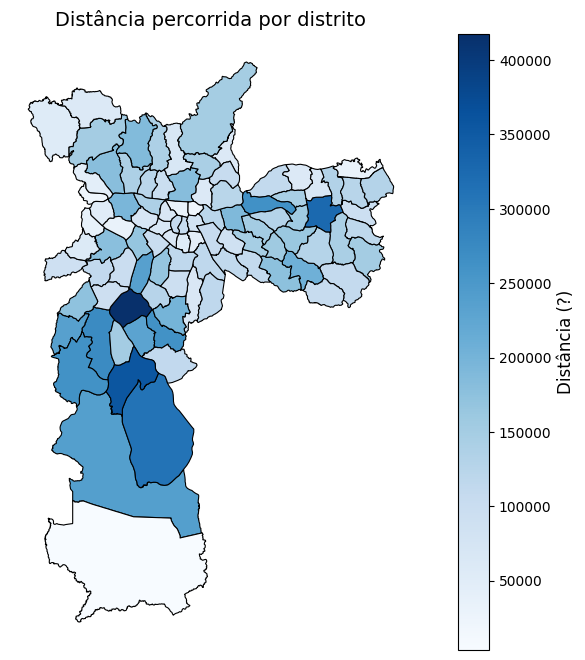

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

norm = mcolors.Normalize(vmin=distritos_final["distancia"].min(), 
                         vmax=distritos_final["distancia"].max())

mapa = distritos_final.plot(
    column="distancia",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    norm=norm,
    ax=ax
)

cbar = mapa.get_figure().get_axes()[1] 
cbar.set_ylabel("Distância (?)", fontsize=12)
cbar.tick_params(labelsize=10)

ax.set_title("Distância percorrida por distrito", fontsize=14)
ax.axis("off")
plt.show()

In [9]:
distritos_final["emissao_nao_eletricos"] = np.where(
    distritos_final["is_eletric"] == False,
    distritos_final["emissao_co"],
    0
)

distritos_final["emissao_eletricos"] = np.where(
    distritos_final["is_eletric"] == True,
    distritos_final["emissao_co"],
    0
)

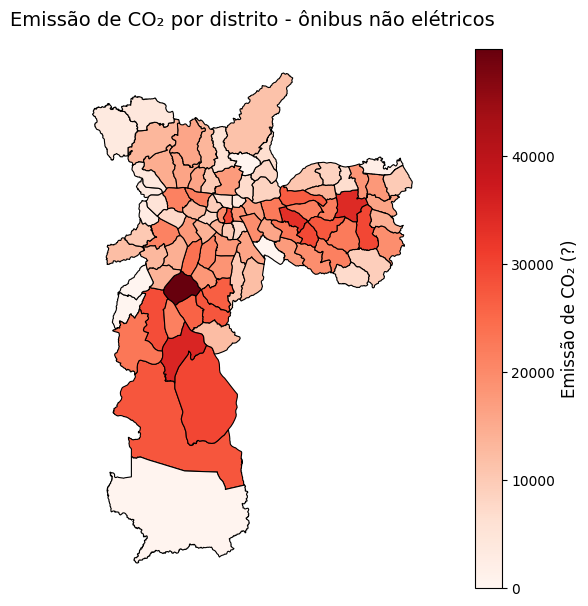

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 7))

norm_nao = mcolors.Normalize(
    vmin=distritos_final["emissao_nao_eletricos"].min(),
    vmax=distritos_final["emissao_nao_eletricos"].max()
)

mapa1 = distritos_final.plot(
    column="emissao_nao_eletricos",
    cmap="Reds",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    norm=norm_nao,
    ax=ax1
)

cbar1 = mapa1.get_figure().get_axes()[1]
cbar1.set_ylabel("Emissão de CO₂ (?)", fontsize=12)
cbar1.tick_params(labelsize=10)
ax1.set_title("Emissão de CO₂ por distrito - ônibus não elétricos", fontsize=14)
ax1.axis("off")

plt.show()

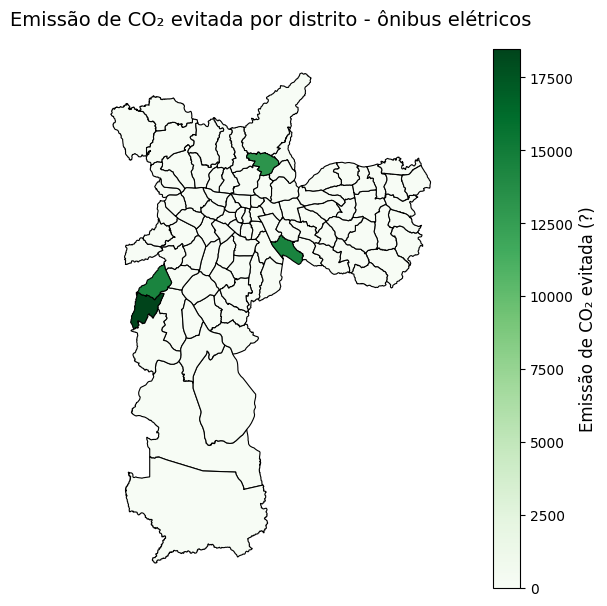

In [11]:
fig, ax2 = plt.subplots(figsize=(12, 7))

norm_ele = mcolors.Normalize(
    vmin=distritos_final["emissao_eletricos"].min(),
    vmax=distritos_final["emissao_eletricos"].max()
)

mapa2 = distritos_final.plot(
    column="emissao_eletricos",
    cmap="Greens",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    norm=norm_ele,
    ax=ax2
)

cbar2 = mapa2.get_figure().get_axes()[1]
cbar2.set_ylabel("Emissão de CO₂ evitada (?)", fontsize=12)
cbar2.tick_params(labelsize=10)
ax2.set_title("Emissão de CO₂ evitada por distrito - ônibus elétricos", fontsize=14)
ax2.axis("off")

plt.show()